Load the audio data. https://www.kaggle.com/datasets/rtatman/speech-accent-archive/

Data also uploaded to google drive "Data" sub-folder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
file_path = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/speakers_all.csv'
df = pd.read_csv(file_path)
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN


In [ ]:
def is_native_speaker(language):
    return 1 if language.lower() == 'english' else 0

df['native_speaker'] = df['native_language'].apply(is_native_speaker)
df = df[['filename', 'native_language', 'country', 'native_speaker']]

# Define the path to your audio files
audio_root = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/recordings/recordings'

# Check for the existence of audio files and filter the DataFrame
df = df[df['filename'].apply(lambda x: os.path.exists(os.path.join(audio_root, x + '.mp3')))]

# Save the filtered DataFrame to a new CSV file
df.to_csv('/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/speakers_modified.csv', index=False)

In [ ]:
df

,filename,native_language,country,native_speaker
32,afrikaans1,afrikaans,south africa,0
33,afrikaans2,afrikaans,south africa,0
34,afrikaans3,afrikaans,south africa,0
35,afrikaans4,afrikaans,south africa,0
36,afrikaans5,afrikaans,south africa,0
...,...,...,...,...
2167,yoruba3,yoruba,nigeria,0
2168,yoruba4,yoruba,nigeria,0
2169,yoruba5,yoruba,nigeria,0
2170,yupik1,yupik,usa,0


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure the native_speaker column is balanced in the test set
# First, separate the DataFrame into two based on the 'native_speaker' value
df_native = df[df['native_speaker'] == 1]
df_non_native = df[df['native_speaker'] == 0]

# Split each DataFrame into train and test sets
train_native, test_native = train_test_split(df_native, test_size=0.1, random_state=42)
train_non_native, test_non_native = train_test_split(df_non_native, test_size=0.1, random_state=42)

# Combine the train sets and the test sets
train_df = pd.concat([train_native, train_non_native])
test_df = pd.concat([test_native, test_non_native])

# Shuffle the rows to mix native and non-native speakers
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df.shape, test_df.shape

((1924, 4), (214, 4))

In [ ]:
train_df

,filename,native_language,country,native_speaker
0,spanish149,spanish,nicaragua,0
1,cantonese17,cantonese,china,0
2,german30,german,austria,0
3,english208,english,usa,1
4,english34,english,usa,1
...,...,...,...,...
1919,romanian8,romanian,romania,0
1920,croatian8,croatian,croatia,0
1921,dutch19,dutch,belgium,0
1922,romanian2,romanian,romania,0


In [ ]:
test_df

,filename,native_language,country,native_speaker
0,english162,english,usa,1
1,italian17,italian,italy,0
2,cantonese7,cantonese,china,0
3,fijian1,fijian,fiji,0
4,spanish116,spanish,colombia,0
...,...,...,...,...
209,farsi2,farsi,iran,0
210,english340,english,usa,1
211,macedonian20,macedonian,macedonia,0
212,ngemba1,ngemba,cameroon,0


In [ ]:
# Define the paths where you want to save the train and test CSV files
train_file_path = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/train_dataset.csv'
test_file_path = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/test_dataset.csv'

In [ ]:
# Save the train and test dataframes to CSV files
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)

print("Train and test datasets saved successfully.")

Train and test datasets saved successfully.


In [ ]:
!nvidia-smi

Wed Nov 29 06:29:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install librosa
!pip install torch torchaudio
!pip install resampy
!pip install tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.3 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import librosa
import numpy as np
import pandas as pd
import resampy
import os
# Define your dataset class
class AudioDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        """
        Args:
            dataframe (pandas.DataFrame): DataFrame containing file names and labels.
            root_dir (string): Directory with all the audio files.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        audio_file = f"{self.root_dir}/{self.dataframe.iloc[idx, 0]}.mp3"
        class_label = self.dataframe.iloc[idx, -1]

        if not os.path.exists(audio_file):
            return None, None

        try:
            # Load and transform the audio file
            audio, sample_rate = librosa.load(audio_file, res_type='kaiser_fast')
            if self.transform:
                audio = self.transform(audio, sample_rate)
            return audio, class_label
        except Exception as e:
            print(f"Error loading file {audio_file}: {e}")
            return None, None

def mfcc_transform(audio, sample_rate):
    # Extract MFCC features from the audio
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your dataframes
train_file_path = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/train_dataset.csv'
test_file_path = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/test_dataset.csv'
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Create datasets
audio_root = '/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/recordings/recordings'
train_dataset = AudioDataset(train_df, audio_root, transform=mfcc_transform)
test_dataset = AudioDataset(test_df, audio_root, transform=mfcc_transform)

# Convert to DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
from tqdm import tqdm
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Adjust the input size to match the size of your MFCC feature vector
        self.fc1 = nn.Linear(40, 512)  # 40 is the size of each MFCC feature vector
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)  # Assuming binary classification (native speaker or not)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network, criterion, and optimizer
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):  # number of epochs
    net.train()
    running_loss = 0.0
    total = 0
    correct = 0
    for inputs, labels in tqdm(train_loader):
        if inputs is None or labels is None:
            continue  # Skip missing files

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}%")

# Testing loop
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on test data: {100 * correct // total}%')


100%|██████████| 61/61 [21:57<00:00, 21.59s/it]


Epoch 1, Loss: 1.056779622054491, Accuracy: 67.25571725571726%


100%|██████████| 61/61 [12:13<00:00, 12.03s/it]


Epoch 2, Loss: 0.6245191859417274, Accuracy: 70.94594594594595%


100%|██████████| 61/61 [12:04<00:00, 11.87s/it]


Epoch 3, Loss: 0.572673926099402, Accuracy: 72.45322245322245%
Accuracy of the network on test data: 73%


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Testing loop
net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds, average='binary')
precision = precision_score(all_labels, all_preds, average='binary')
f1 = f1_score(all_labels, all_preds, average='binary')

print(f'Accuracy: {accuracy * 100}%')
print(f'Recall: {recall * 100}%')
print(f'Precision: {precision * 100}%')
print(f'F1 Score: {f1 * 100}%')


Accuracy: 73.36448598130842%
Recall: 1.7241379310344827%
Precision: 100.0%
F1 Score: 3.389830508474576%


# More Steps


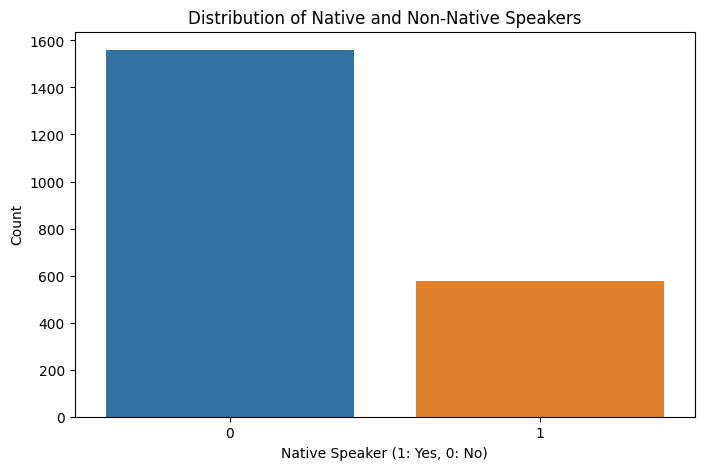

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of native and non-native speakers
speaker_counts = df['native_speaker'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=speaker_counts.index, y=speaker_counts.values)
plt.title('Distribution of Native and Non-Native Speakers')
plt.xlabel('Native Speaker (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Balancing the dataset
min_count = df['native_speaker'].value_counts().min()
df_balanced = pd.concat([
    df[df['native_speaker'] == 0].sample(min_count),
    df[df['native_speaker'] == 1].sample(min_count)
])

# Splitting into train and test sets
train_balanced, test_balanced = train_test_split(df_balanced, test_size=0.1, random_state=42, stratify=df_balanced['native_speaker'])

print(train_balanced['native_speaker'].value_counts())
print(test_balanced['native_speaker'].value_counts())


0    521
1    521
Name: native_speaker, dtype: int64
1    58
0    58
Name: native_speaker, dtype: int64


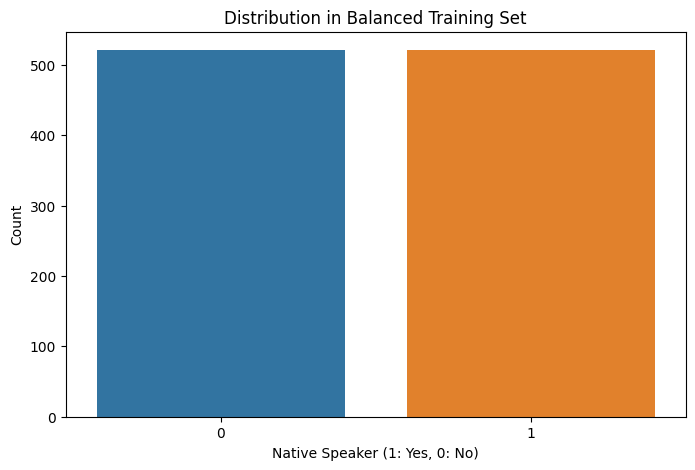

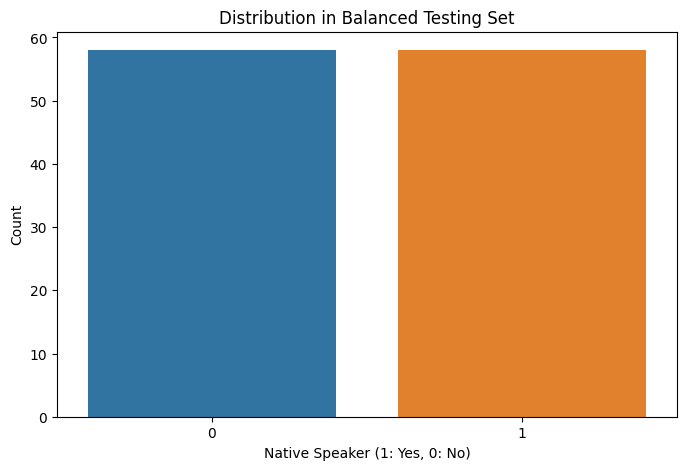

In [ ]:
import matplotlib.pyplot as plt

# Visualization of Balanced Training Set
train_speaker_counts = train_balanced['native_speaker'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=train_speaker_counts.index, y=train_speaker_counts.values)
plt.title('Distribution in Balanced Training Set')
plt.xlabel('Native Speaker (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Visualization of Balanced Testing Set
test_speaker_counts = test_balanced['native_speaker'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=test_speaker_counts.index, y=test_speaker_counts.values)
plt.title('Distribution in Balanced Testing Set')
plt.xlabel('Native Speaker (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


In [ ]:
!pip install transformers


In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import librosa
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Wav2Vec 2.0 processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(device)

class Wav2VecCNN(nn.Module):
    def __init__(self):
        super(Wav2VecCNN, self).__init__()
        self.conv1 = nn.Conv1d(768, 128, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # 全局平均池化
        self.fc1 = nn.Linear(64, 128)  # 请注意这里的尺寸
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.softmax(x, dim=1)  # 应用softmax得到概率
        return x

# 实例化模型
cnn_model = Wav2VecCNN().to(device)




Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.nn.utils.rnn import pad_sequence

max_length = 16000 * 10  # For example, 10 seconds at 16kHz

def preprocess_audio(file_path):
    speech, _ = librosa.load(file_path, sr=16000, mono=True, duration=10)  # Load only 10 seconds of audio
    input_values = processor(speech, return_tensors="pt", sampling_rate=16000).input_values[0]
    return input_values


class AudioDataset(Dataset):
    def __init__(self, dataframe, root_dir):
        self.dataframe = dataframe
        self.root_dir = root_dir

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        audio_file = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0] + '.mp3')
        class_label = self.dataframe.iloc[idx, -1]

        if not os.path.exists(audio_file):
            return None, None

        input_values = preprocess_audio(audio_file)
        return input_values, class_label

def collate_fn(batch):
    batch = [x for x in batch if x[0] is not None and x[1] is not None]
    inputs, labels = zip(*batch)
    inputs_padded = pad_sequence(inputs, batch_first=True, padding_value=0.0)
    labels = torch.tensor(labels, dtype=torch.long)
    return inputs_padded, labels

# Assuming train_df and audio_root are already defined
train_dataset = AudioDataset(train_df, audio_root)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)


In [ ]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    # Filter out the None values
    batch = [x for x in batch if x[0] is not None and x[1] is not None]

    inputs, labels = zip(*batch)

    # Pad the input sequences to have the same length
    inputs_padded = pad_sequence(inputs, batch_first=True, padding_value=0.0)

    # Convert labels to a tensor
    labels = torch.tensor(labels, dtype=torch.long)

    return inputs_padded, labels

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)



In [ ]:
!pip install tqdm


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
from tqdm import tqdm

for epoch in range(3):  # Adjust the number of epochs as needed
    cnn_model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
    for i, (inputs, labels) in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass through Wav2Vec 2.0 for feature extraction
        with torch.no_grad():
            inputs = wav2vec_model(inputs).last_hidden_state

        # Forward pass through CNN model
        optimizer.zero_grad()
        outputs = cnn_model(inputs.transpose(1, 2))  # Adjusting dimensions for CNN input
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update progress bar
        progress_bar.set_description(f"Epoch {epoch + 1}")
        progress_bar.set_postfix(loss=running_loss / (i + 1), accuracy=100. * correct / total)
    # 在循环结束时计算整个 epoch 的准确率
    epoch_accuracy = 100. * correct / total
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Accuracy: {epoch_accuracy}%")

Epoch 1: 100%|██████████| 121/121 [16:34<00:00,  8.22s/it, accuracy=79.2, loss=0.509]


Epoch 1, Loss: 0.5091441155465182, Accuracy: 79.15800415800416%


Epoch 2: 100%|██████████| 121/121 [01:02<00:00,  1.95it/s, accuracy=85.9, loss=0.449]


Epoch 2, Loss: 0.44872830894367755, Accuracy: 85.86278586278586%


Epoch 3: 100%|██████████| 121/121 [01:02<00:00,  1.93it/s, accuracy=87.1, loss=0.441]

Epoch 3, Loss: 0.4411693582357454, Accuracy: 87.11018711018711%


In [ ]:
# 创建测试集 DataLoader
test_dataset = AudioDataset(test_df, audio_root)  # 假设 test_df 是你的测试集 DataFrame
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


In [ ]:
cnn_model.eval()
wav2vec_model.eval()

all_probs = []  # 用于收集概率
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)

        # 通过 Wav2Vec 2.0 模型进行特征提取
        inputs = wav2vec_model(inputs).last_hidden_state

        # 现在可以传递到 CNN 模型
        outputs = cnn_model(inputs.transpose(1, 2))
        probs = outputs.cpu().numpy()  # 获取概率
        predicted = np.argmax(probs, axis=1)  # 获取预测类别

        all_probs.extend(probs[:, 1])  # 假设阳性类别为第二列
        all_labels.extend(labels.numpy())

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import numpy as np
# 将列表转换为 NumPy 数组
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# 计算评估指标
test_accuracy = accuracy_score(all_labels, all_preds)
test_recall = recall_score(all_labels, all_preds, average='binary')
test_precision = precision_score(all_labels, all_preds, average='binary')
test_f1_score = f1_score(all_labels, all_preds, average='binary')

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test Precision: {test_precision}")
print(f"Test F1 Score: {test_f1_score}")


Test Accuracy: nan
Test Recall: 0.0
Test Precision: 0.0
Test F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is 

In [ ]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(all_labels, all_preds)
tn, fp, fn, tp = cm.ravel()

# 计算 FPR 和 FNR
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")


ValueError: ignored

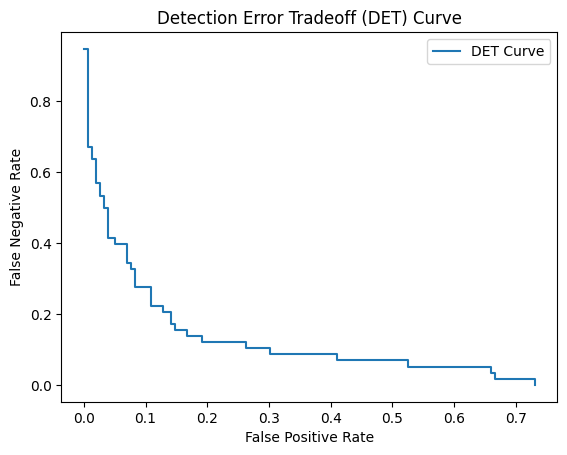

In [ ]:
from sklearn.metrics import det_curve

# 计算DET曲线
fpr, fnr, thresholds = det_curve(all_labels, all_probs)

# 绘制DET曲线
plt.figure()
plt.plot(fpr, fnr, label="DET Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.title("Detection Error Tradeoff (DET) Curve")
plt.legend()
plt.show()


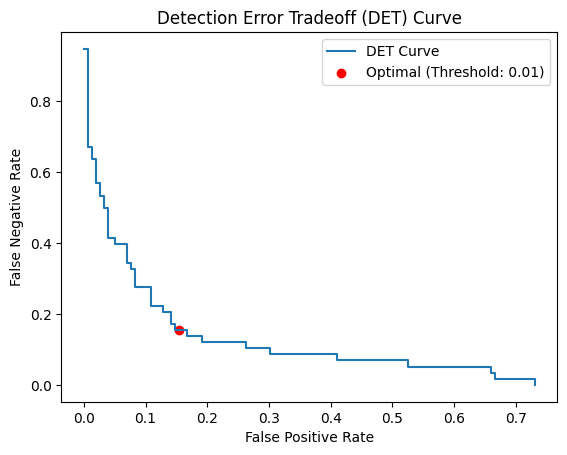

In [ ]:
from sklearn.metrics import det_curve
import numpy as np
import matplotlib.pyplot as plt

# 计算DET曲线
fpr, fnr, thresholds = det_curve(all_labels, all_probs)

# 寻找平衡点（最小化FPR和FNR之差的点）
optimal_idx = np.argmin(np.abs(fpr - fnr))
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_fnr = fnr[optimal_idx]

# 绘制DET曲线
plt.figure()
plt.plot(fpr, fnr, label="DET Curve")
plt.scatter(optimal_fpr, optimal_fnr, color='red', label=f'Optimal (Threshold: {optimal_threshold:.2f})')  # 标出最优点
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.title("Detection Error Tradeoff (DET) Curve")
plt.legend()
plt.show()


In [ ]:
# 创建整个数据集的 DataLoader
full_dataset = AudioDataset(df, audio_root)  # 假设 df 是整个数据集的 DataFrame
full_loader = DataLoader(full_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


In [ ]:
cnn_model.eval()
wav2vec_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)

        # 通过 Wav2Vec 2.0 模型进行特征提取
        inputs = wav2vec_model(inputs).last_hidden_state

        # 现在可以传递到 CNN 模型
        outputs = cnn_model(inputs.transpose(1, 2))
        probs = outputs.cpu().numpy()  # 获取概率
        predicted = np.argmax(probs, axis=1)  # 获取预测类别

        all_probs.extend(probs[:, 1])  # 假设阳性类别为第二列
        all_labels.extend(labels.numpy())


In [ ]:
import pandas as pd
# 创建一个包含原始数据和预测结果的新 DataFrame
results_df = df.copy()  # 假设 df 是原始数据集的 DataFrame
results_df['Predicted'] = all_preds
results_df['Actual'] = all_labels



# 保存 DataFrame 到 CSV 文件
results_df.to_csv('/content/drive/My Drive/Deep_Learning_Project_Fall_2023/Data/Kaggle_Speech/predicted_dataset.csv', index=False)


In [ ]:
from sklearn.metrics import accuracy_score

# 计算准确率
overall_accuracy = accuracy_score(all_labels, all_preds)
print(f"Overall Accuracy: {overall_accuracy}")

In [ ]:
results_df

In [ ]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(all_labels, all_preds)
tn, fp, fn, tp = cm.ravel()

# 计算 FPR 和 FNR
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")


In [ ]:
from sklearn.metrics import det_curve
import matplotlib.pyplot as plt

# 计算 DET 曲线
fpr, fnr, thresholds = det_curve(all_labels, all_preds)

# 绘制 DET 曲线
plt.figure()
plt.plot(fpr, fnr, label="DET Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.title("Detection Error Tradeoff (DET) Curve")
plt.legend()
plt.show()


In [ ]:
while(1):
  a = 0

In [52]:
def predict(audio_file, model, processor, max_length=16000*10):

    speech, _ = librosa.load(audio_file, sr=16000, mono=True, duration=10)
    input_values = processor(speech, return_tensors="pt", sampling_rate=16000).input_values.to(device)


    with torch.no_grad():
        features = wav2vec_model(input_values).last_hidden_state
        outputs = model(features.transpose(1, 2))
        probs = torch.softmax(outputs, dim=1)
        predicted = torch.argmax(probs, dim=1)

    return predicted.item()


In [53]:
import ipywidgets as widgets
from IPython.display import display, Audio

upload_button = widgets.FileUpload(accept='.mp3', multiple=False)

display(upload_button)


FileUpload(value={}, accept='.mp3', description='Upload')

Predicted: Non-Native Speaker.
Predicted: Non-Native Speaker.
Predicted: Non-Native Speaker.
Predicted: Non-Native Speaker.
Predicted: Non-Native Speaker.
Predicted: Non-Native Speaker.
Predicted: Native Speaker.
Predicted: Native Speaker.


In [54]:
import io

def on_upload_change(change):
    if not upload_button.value:
        return

    uploaded_file = next(iter(upload_button.value.values()))
    audio_content = io.BytesIO(uploaded_file['content'])

    prediction = predict(audio_content, cnn_model, processor)

    if prediction == 1:
        print("Predicted: Native Speaker.")
    else:
        print("Predicted: Non-Native Speaker.")

upload_button.observe(on_upload_change, names='_counter')
